# load saved episode data and test plotting functions

Load the necessary library

In [2]:
import numpy as np
import os

import pandas as pd

from plot_experiment import plot_episode_data_virtual
from eval_metrics import success_rate_from_distances
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
load_dir = "../evaluations/fail_2_thr/"
experiments = os.listdir(load_dir)
print(experiments)
# getting all the actions for all the episodes under the @load_dir experiments
all_actions = [pd.read_csv(load_dir + experiment + "/" + ep + "/actions.csv", index_col=None)
                        for experiment in experiments for ep in os.listdir(load_dir + experiment) if ".png" not in ep]

['MLP_GTXY_UF_0.25_ST_PE_0.03_PAV_1.5_PLV_0.01']


In [4]:
print(all_actions[0].shape)

(500, 9)


In [5]:
print(len(all_actions))
for i in range(len(all_actions)):
    all_actions[i].drop(columns=["Unnamed: 0"], inplace=True)

all_actions[0].head()

5


,0,1,2,3,4,5,6,7
0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0


In [6]:
# Find the column (thruster) that has only zeros (no action) for all the time steps
unused_thrusters = [f'thr {col} exp {i}' for i in range(len(all_actions)) for col in all_actions[i].columns if all_actions[i][col].sum() == 0]
unused_thrusters

['thr 0 exp 4',
 'thr 1 exp 4',
 'thr 2 exp 4',
 'thr 3 exp 4',
 'thr 4 exp 4',
 'thr 5 exp 4',
 'thr 6 exp 4',
 'thr 7 exp 4']

In [7]:
all_actions[2].shape

(500, 8)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

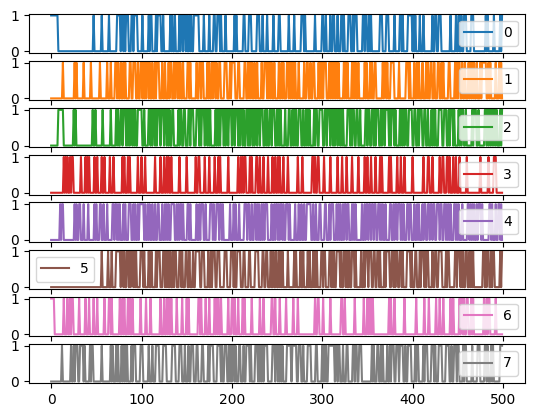

In [8]:

all_actions[0].plot(subplots=True)

<BarContainer object of 8 artists>

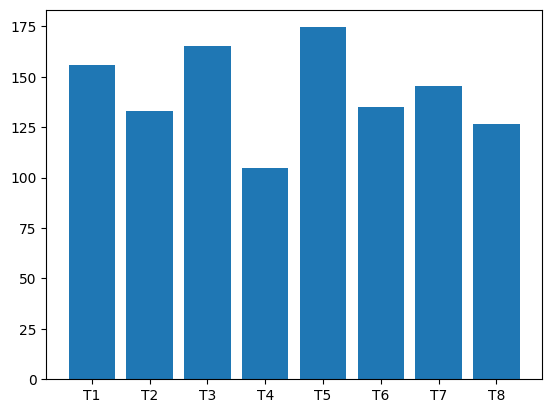

In [9]:
freq = pd.DataFrame(data=np.array([all_actions[i].sum() for i in range(len(all_actions))]), 
                    columns=[f'T{i+1}' for i in range(8)])

mean_freq = freq.mean()
mean_freq.shape
plt.bar(mean_freq.index, mean_freq.values)


<AxesSubplot:>

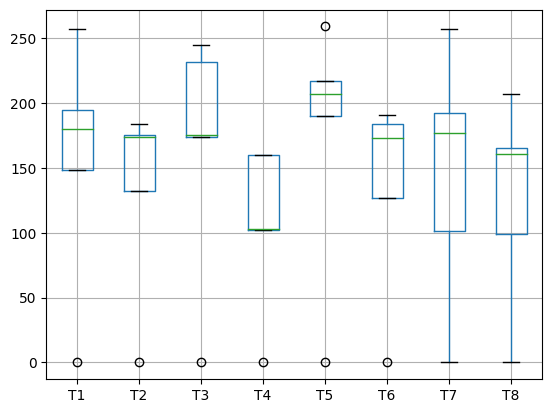

In [10]:
freq.boxplot()

<AxesSubplot:>

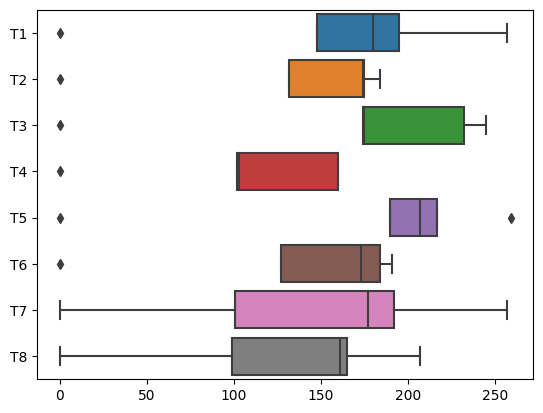

In [11]:
sns.boxplot(data=freq, orient="h")

In [12]:
all_actions[0].describe()

,0,1,2,3,4,5,6,7
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.296000,0.350000,0.464000,0.206000,0.414000,0.382000,0.202000,0.414000
std,0.456948,0.477447,0.499202,0.404836,0.493042,0.486363,0.401894,0.493042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
res_multi_linR = pd.read_csv("../evaluations/icra24/linR/multi_model_performance.csv", index_col=[0])

In [14]:
res_multi_linR

,Unnamed: 0,success_rate_0.02_m,success_rate_0.01_m,success_and_stay_within_0.15_m,avg_rew,avg_ang_vel,avg_action_count,model
0,0,98.046875,98.046875,96.875000,0.771658,-4.835041,24.17025,nominal_GoToXY_MLP_linRew_PE_0.04
1,1,97.265625,97.265625,95.312500,0.761237,-5.457446,15.47475,nominal_GoToXY_MLP_linRew_PE_0.05
2,2,98.437500,98.437500,95.703125,0.770621,-3.365598,38.95375,nominal_GoToXY_MLP_linRew_PE_0.02
3,3,98.437500,98.437500,96.484375,0.777442,-5.245291,36.10400,nominal_GoToXY_MLP_linRew_PE_0.03
4,4,98.046875,97.656250,95.312500,0.712841,-0.899171,112.21325,nominal_GoToXY_MLP_linRew
5,5,99.218750,99.218750,98.046875,0.781208,-3.393033,68.96975,nominal_GoToXY_MLP_linRew_PE_0.01
